In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('//content//drive//MyDrive//Wine_Quality_classification//winequality-white_01.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,-0.5
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,-0.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,-0.5
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,-0.5
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,-0.5


In [4]:
df.shape

(9796, 12)

In [5]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,-0.511668
std,0.843825,0.100789,0.121014,5.071799,0.021847,17.006269,42.495895,0.002991,0.150993,0.114120,1.230558,0.156080
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,-0.900000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,-0.600000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,-0.500000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,-0.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,-0.100000


In [6]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9796 entries, 0 to 9795
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         9796 non-null   float64
 1   volatile acidity      9796 non-null   float64
 2   citric acid           9796 non-null   float64
 3   residual sugar        9796 non-null   float64
 4   chlorides             9796 non-null   float64
 5   free sulfur dioxide   9796 non-null   float64
 6   total sulfur dioxide  9796 non-null   float64
 7   density               9796 non-null   float64
 8   pH                    9796 non-null   float64
 9   sulphates             9796 non-null   float64
 10  alcohol               9796 non-null   float64
 11  quality               9796 non-null   float64
dtypes: float64(12)
memory usage: 918.5 KB


## Preprocessing the dataset

In [7]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df['quality'].unique()

array([-0.5, -0.3, -0.7, -0.8, -0.2, -0.1, -0.9, -0.6, -0.4])

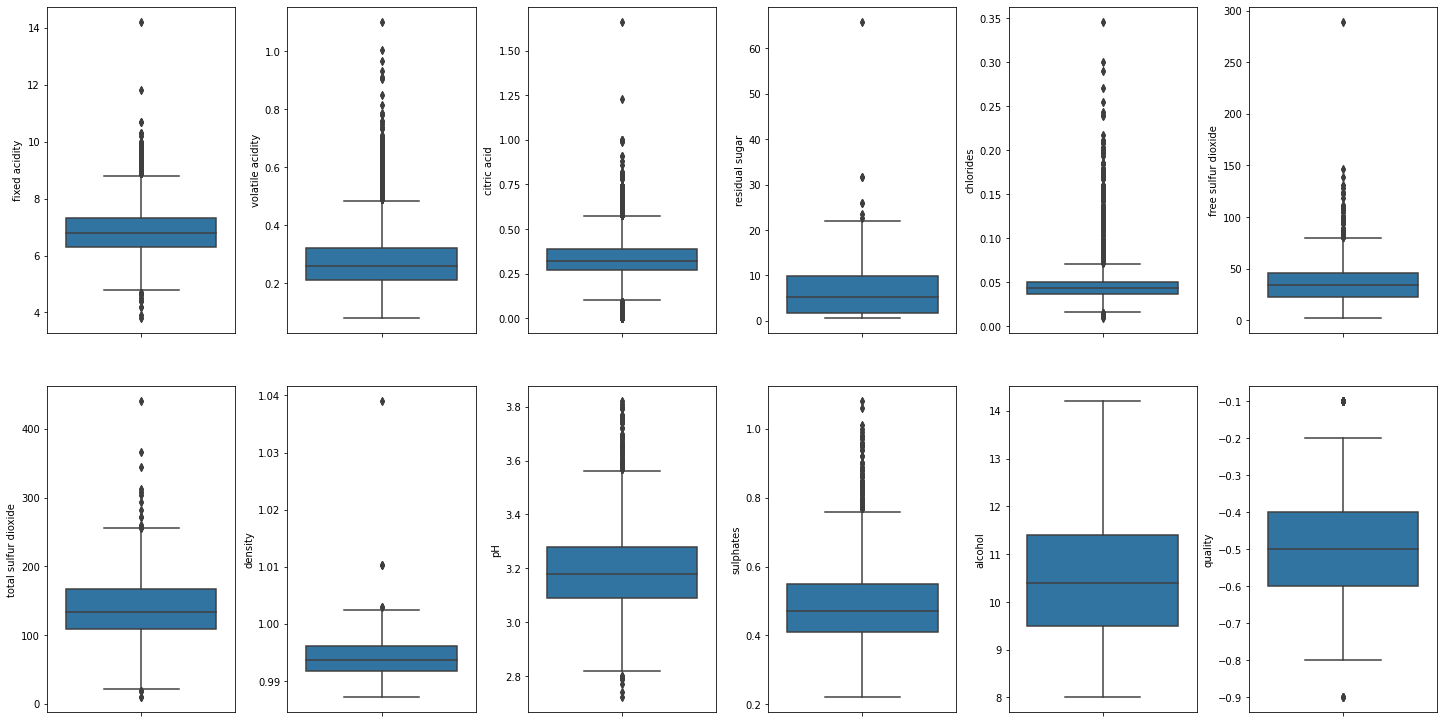

In [9]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

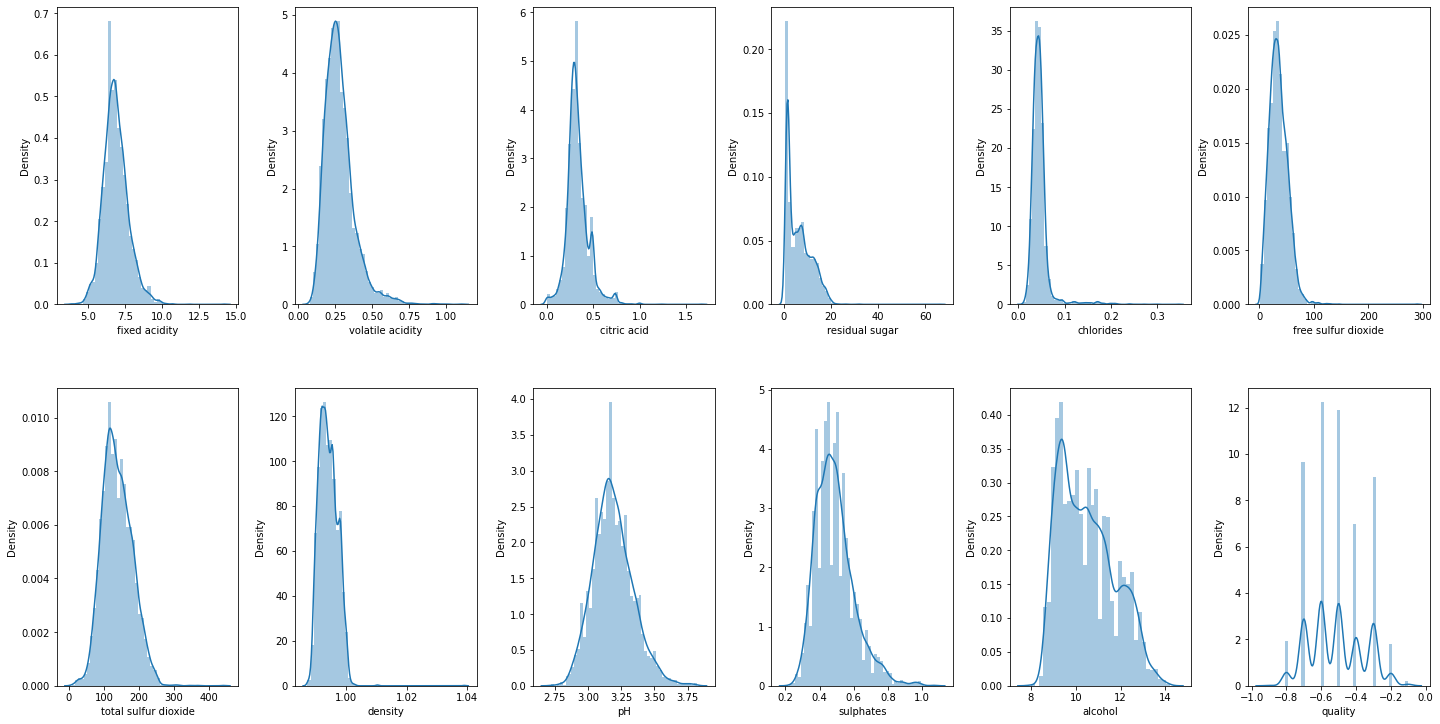

In [10]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

##corelation matrix

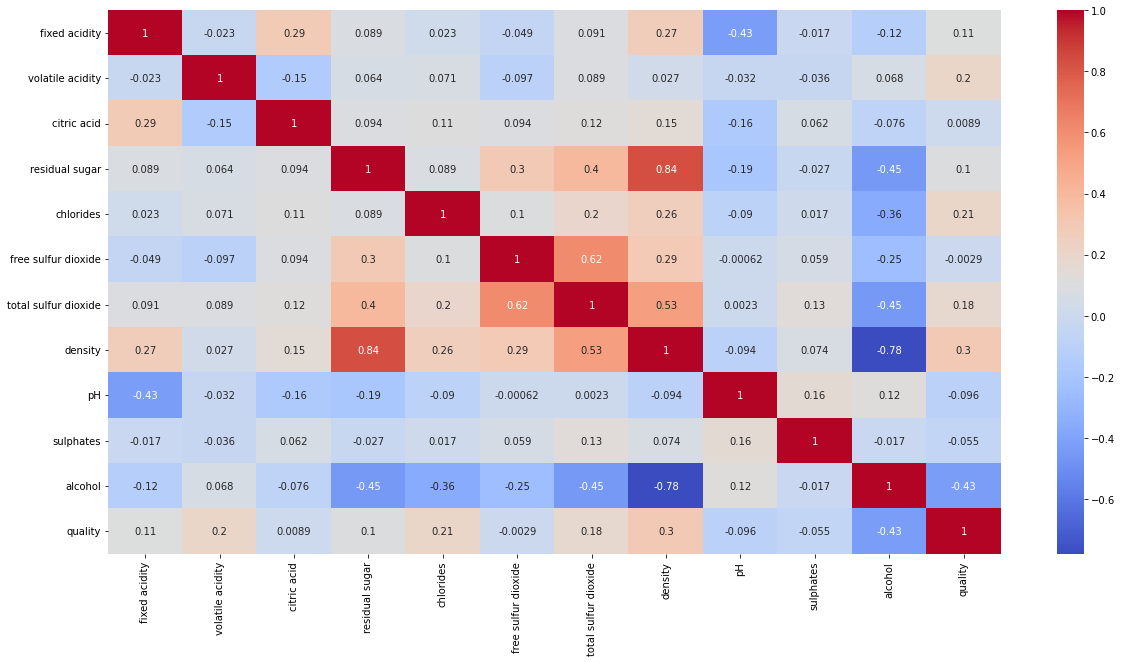

In [11]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

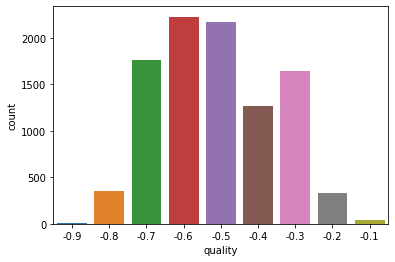

In [12]:
sns.countplot(df['quality'])

In [13]:
#count of each target variable
from collections import Counter
Counter(df['quality'])

Counter({-0.9: 10,
         -0.8: 350,
         -0.7: 1760,
         -0.6: 2228,
         -0.5: 2168,
         -0.4: 1271,
         -0.3: 1643,
         -0.2: 326,
         -0.1: 40})

## Input Split

In [14]:
X = df.drop(columns=['quality']).values
y = df['quality']

In [15]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in df['quality']:
    if i >= -0.3 and i <= -0.1:
        reviews.append('1')
    elif i >= -0.6 and i <= -0.4:
        reviews.append('2')
    elif i >= -0.9 and i <= -0.7:
        reviews.append('3')
df['Reviews'] = reviews

In [16]:
#view final data
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [17]:
df['Reviews'].unique()

array(['2', '1', '3'], dtype=object)

In [18]:
Counter(df['Reviews'])

Counter({'1': 2009, '2': 5667, '3': 2120})

In [19]:
x = df.iloc[:,:11]
y = df['Reviews']

In [20]:
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [21]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Reviews, dtype: object

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
#view the scaled features
print(X)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


In [24]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

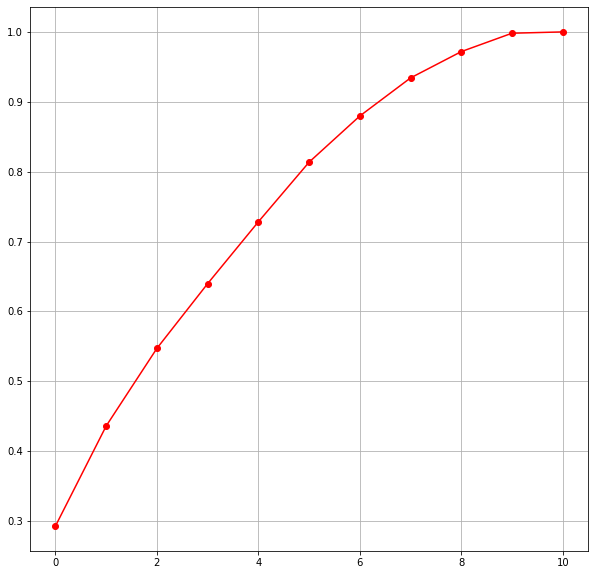

In [25]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [26]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [27]:
print(x_new)

[[ 3.37327539e+01  1.23828497e+00  1.27752918e+01 ... -1.00475770e-01
   1.46143586e-02  7.95722613e-03]
 [-1.19257997e+01 -1.89575189e+01 -3.85783398e+00 ...  3.16391378e-02
   2.58503942e-02 -3.61370423e-02]
 [-4.12246715e+01  5.73987365e+00  2.46603160e+00 ...  1.71029754e-01
  -3.08760462e-02 -8.19099329e-02]
 ...
 [-2.79942228e+01  1.98656157e+00 -3.76679051e+00 ... -2.22925208e-01
  -7.45031896e-02  9.23658037e-02]
 [-3.16256228e+01 -7.36798453e+00 -3.85584946e+00 ... -2.74500049e-02
  -5.63418277e-03 -1.23184139e-01]
 [-4.26690900e+01 -2.30113142e+00 -3.60383843e+00 ... -6.61881225e-02
   4.93503256e-02 -1.86652178e-01]]


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7347, 8)
(7347,)
(2449, 8)
(2449,)


##Proceed with Modelling.
We will use the following algorithms 
1. Logistic Regression
2. Decision Trees
3. Naive Bayes
4. SVM
5. Random Forests

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [31]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)
print(classification_report(y_test,lr_predict))

[[  46  453    3]
 [  32 1318   69]
 [   0  351  177]]
62.92364230298081
              precision    recall  f1-score   support

           1       0.59      0.09      0.16       502
           2       0.62      0.93      0.74      1419
           3       0.71      0.34      0.46       528

    accuracy                           0.63      2449
   macro avg       0.64      0.45      0.45      2449
weighted avg       0.63      0.63      0.56      2449



In [32]:
y.value_counts()

2    5667
3    2120
1    2009
Name: Reviews, dtype: int64

# Balancing dataset

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [40]:
x_train_smote,y_train_smote = smote.fit_sample(x_train, y_train)

In [42]:
from collections import Counter
print('Before smote:',Counter(y_train))
print('After smote:',Counter(y_train_smote))

Before smote: Counter({'2': 4248, '3': 1592, '1': 1507})
After smote: Counter({'2': 4248, '1': 4248, '3': 4248})


Proceed with Modelling.
We will use the following algorithms 
1. Logistic Regression
2. Decision Trees
3. Naive Bayes
4. SVM
5. Random Forests

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
lr = LogisticRegression()
lr.fit(x_train_smote, y_train_smote)
lr_predict = lr.predict(x_test)

In [44]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)
print(classification_report(y_test,lr_predict))

[[338 100  64]
 [607 349 463]
 [ 67  64 397]]
44.26296447529604
              precision    recall  f1-score   support

           1       0.33      0.67      0.45       502
           2       0.68      0.25      0.36      1419
           3       0.43      0.75      0.55       528

    accuracy                           0.44      2449
   macro avg       0.48      0.56      0.45      2449
weighted avg       0.56      0.44      0.42      2449



44% accuracy with Logistic Regression! Let's see with Decision Trees

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_smote,y_train_smote)
dt_predict = dt.predict(x_test)

In [48]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)
print(classification_report(y_test,dt_predict))

[[ 251  243    8]
 [ 372 1003   44]
 [  14   32  482]]
70.88607594936708
              precision    recall  f1-score   support

           1       0.39      0.50      0.44       502
           2       0.78      0.71      0.74      1419
           3       0.90      0.91      0.91       528

    accuracy                           0.71      2449
   macro avg       0.69      0.71      0.70      2449
weighted avg       0.73      0.71      0.72      2449



71% accuracy with Decision tree! Let's Use NaiveBayes

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_smote,y_train_smote)
nb_predict=nb.predict(x_test)

In [50]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)
print(classification_report(y_test,nb_predict))

[[343 107  52]
 [632 324 463]
 [ 77  58 393]]
43.28297264189465
              precision    recall  f1-score   support

           1       0.33      0.68      0.44       502
           2       0.66      0.23      0.34      1419
           3       0.43      0.74      0.55       528

    accuracy                           0.43      2449
   macro avg       0.47      0.55      0.44      2449
weighted avg       0.54      0.43      0.41      2449



43% accuracy with naive bayes!Let's use RandomForest classifier now

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_smote, y_train_smote)
rf_predict=rf.predict(x_test)

In [53]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)
print(classification_report(y_test,rf_predict))

[[ 233  267    2]
 [ 336 1051   32]
 [  10   42  476]]
71.86606778276847
              precision    recall  f1-score   support

           1       0.40      0.46      0.43       502
           2       0.77      0.74      0.76      1419
           3       0.93      0.90      0.92       528

    accuracy                           0.72      2449
   macro avg       0.70      0.70      0.70      2449
weighted avg       0.73      0.72      0.72      2449



72% accuracy with Random forest

In [54]:
from sklearn.svm import SVC

In [56]:
#we shall use the rbf kernel first and check the accuracy
svc = SVC()
svc.fit(x_train_smote, y_train_smote)
svc_predict=rf.predict(x_test)

In [57]:
#print confusion matrix and accuracy score
svc_conf_matrix = confusion_matrix(y_test, rf_predict)
svc_acc_score = accuracy_score(y_test, rf_predict)
print(svc_conf_matrix)
print(svc_acc_score*100)
print(classification_report(y_test,svc_predict))

[[ 233  267    2]
 [ 336 1051   32]
 [  10   42  476]]
71.86606778276847
              precision    recall  f1-score   support

           1       0.40      0.46      0.43       502
           2       0.77      0.74      0.76      1419
           3       0.93      0.90      0.92       528

    accuracy                           0.72      2449
   macro avg       0.70      0.70      0.70      2449
weighted avg       0.73      0.72      0.72      2449



72% accuracy with svc! Let's try with hyperparameter

The same accuracy! So we can see that the SVC and the Random Forest give us good prediction accuracy for the Wine Classification problem.

In [58]:
#hyperparameter tuning

In [59]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [60]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 63.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [61]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 780,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

In [62]:
rf_randomcv

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [63]:
best_random_grid=rf_randomcv.best_estimator_

In [64]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("classification_report {}".format(classification_report(y_test,y_pred)))

[[ 188  314    0]
 [ 263 1146   10]
 [   0   64  464]]
Accuracy Score 0.7341772151898734
classification_report               precision    recall  f1-score   support

           1       0.42      0.37      0.39       502
           2       0.75      0.81      0.78      1419
           3       0.98      0.88      0.93       528

    accuracy                           0.73      2449
   macro avg       0.72      0.69      0.70      2449
weighted avg       0.73      0.73      0.73      2449



we can observed that accuracy has been increased from 72% to 73% with hyperparameter tunning in Random Forest!